In [2]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [11]:
model_loop_b5_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b15 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 15, 1])

metrics_l1_b5_b15_d10 = train_without_config(
    model_loop_b5_b15, cirriculum_b5_b15, model_n_dims=n_dims, 
    log_every_steps=10, train_steps=15000, family="gpt2_loop", 
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 2.9466633796691895: 100%|██████████| 15000/15000 [15:46<00:00, 15.86it/s]


In [17]:
model_loop_b5 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5_d10 = train_without_config(
    model_loop_b5, cirriculum_b5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 4.829997539520264: 100%|██████████| 15000/15000 [08:03<00:00, 31.03it/s] 


In [20]:
model_loop_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [5000, 10, 0])

metrics_l1_b10_d10 = train_without_config(model_loop_b10, cirriculum_b10, model_n_dims=n_dims,
                                          log_every_steps=10, train_steps=15000, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.8679158687591553: 100%|██████████| 15000/15000 [14:50<00:00, 16.84it/s]


In [24]:
model_loop_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b15 = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [5000, 15, 0])

metrics_l1_b15_d10 = train_without_config(model_loop_b15, cirriculum_b15, model_n_dims=n_dims,
                                          log_every_steps=10, train_steps=15000, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.1161487102508545: 100%|██████████| 15000/15000 [21:17<00:00, 11.74it/s]


In [27]:
model_loop_b5_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b10 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [2000, 10, 1])

metrics_l1_b5_b10_d10 = train_without_config(
    model_loop_b5_b10, cirriculum_b5_b10, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 4.429057598114014: 100%|██████████| 15000/15000 [12:30<00:00, 19.98it/s] 


In [30]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in range(1, 150):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=21, family="gpt2_loop", task_name="noisy_linear_regression")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop

steps_b10, values_b10 = calculate_by_loop(model_loop_b10)
steps_b5, values_b5 = calculate_by_loop(model_loop_b5)
steps_b5_b15, values_b5_b15 = calculate_by_loop(model_loop_b5_b15)
steps_b15, values_b15 = calculate_by_loop(model_loop_b15)
steps_b5_b10, values_b5_b10 = calculate_by_loop(model_loop_b5_b10)

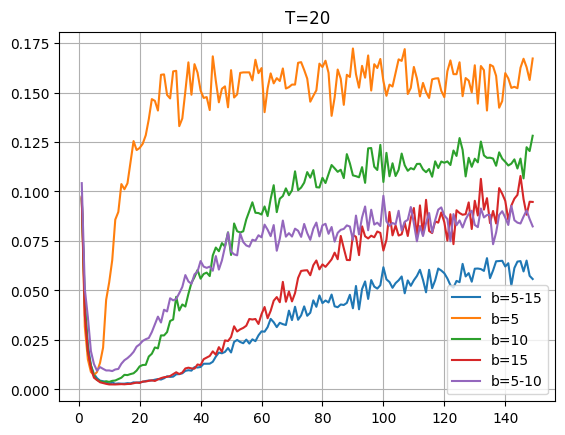

In [45]:
plt.plot(steps_b5_b15, values_b5_b15)
plt.plot(steps_b5, values_b5)
plt.plot(steps_b10, values_b10)
plt.plot(steps_b15, values_b15)
plt.plot(steps_b5_b10, values_b5_b10)
plt.grid()
plt.title("T=20")
plt.legend(["b=5-15", "b=5", "b=10", "b=15", "b=5-10"])
plt.savefig('../images/check_for_scheduling_convergence_properties_noisy_linear_regression.png')